In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(
    {"figure.figsize": (17, 7)},
    style="ticks",
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=1.2
)

%config InlineBackend.figure_format = "retina"

In [ ]:
game_name = "SMB1"
num_steps = "200M"
run_count = "1"

In [ ]:
experiment = pd.DataFrame(np.load(f"BTR_{game_name}{num_steps}_{run_count}/BTR_{game_name}{num_steps}Experiment.npy"))
print("experiment shape:", experiment.shape)
evaluation = pd.DataFrame(np.load("BTR_SMB1200M_1/BTR_SMB1200MEvaluation.npy"))
print("experiment shape:", experiment.shape)


(3251, 2)

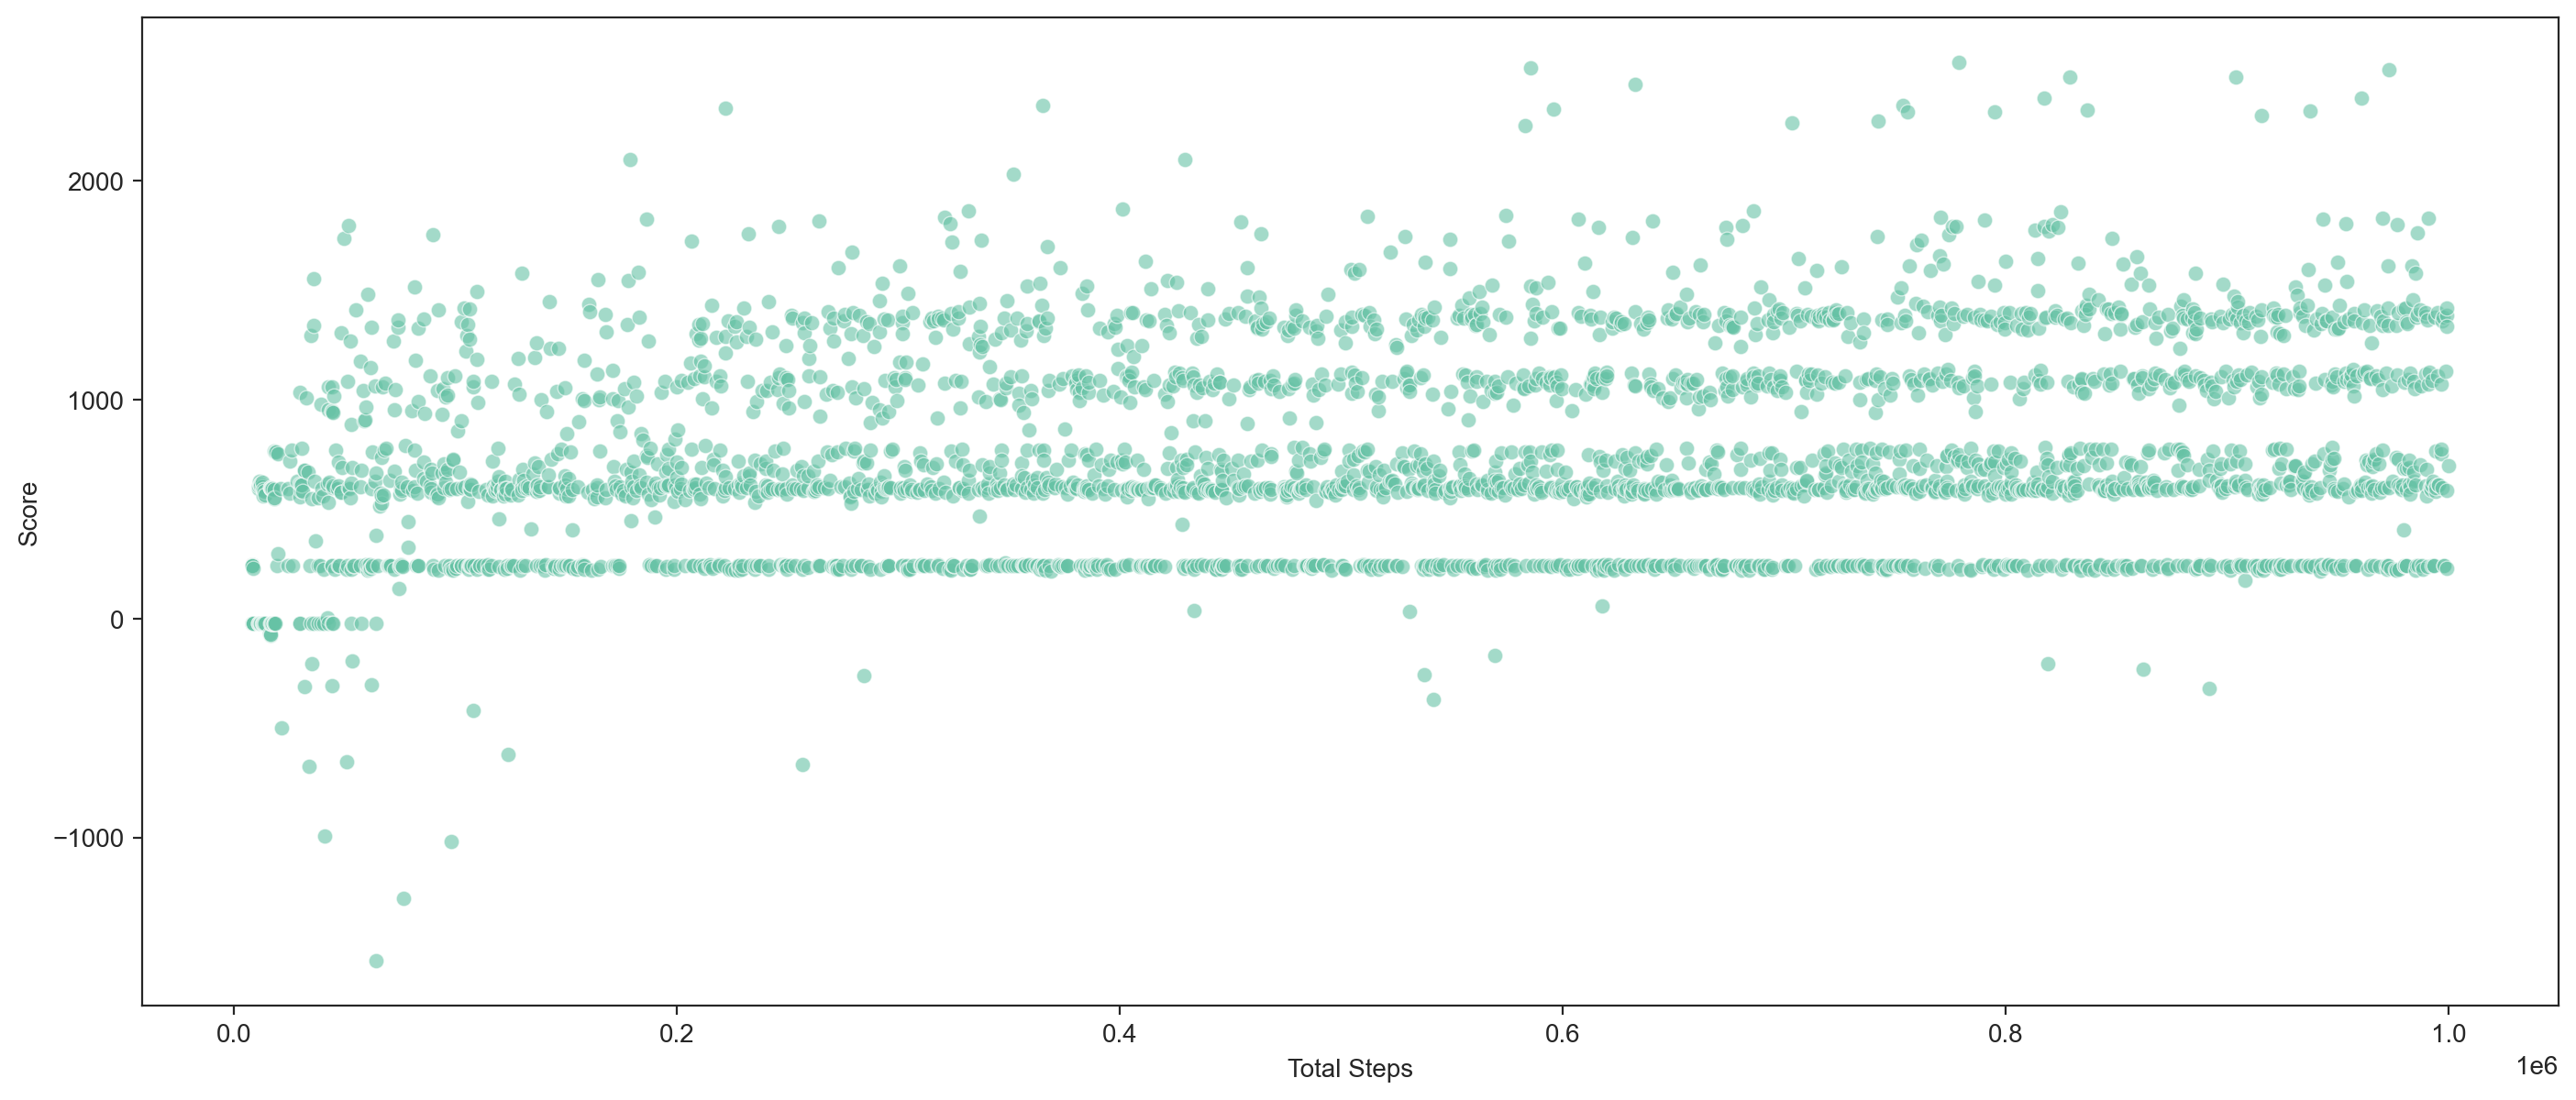

In [ ]:
sns.scatterplot(experiment, x=1, y=0, alpha=0.6);
plt.xlabel("Total Steps")
plt.ylabel("Score");

3251


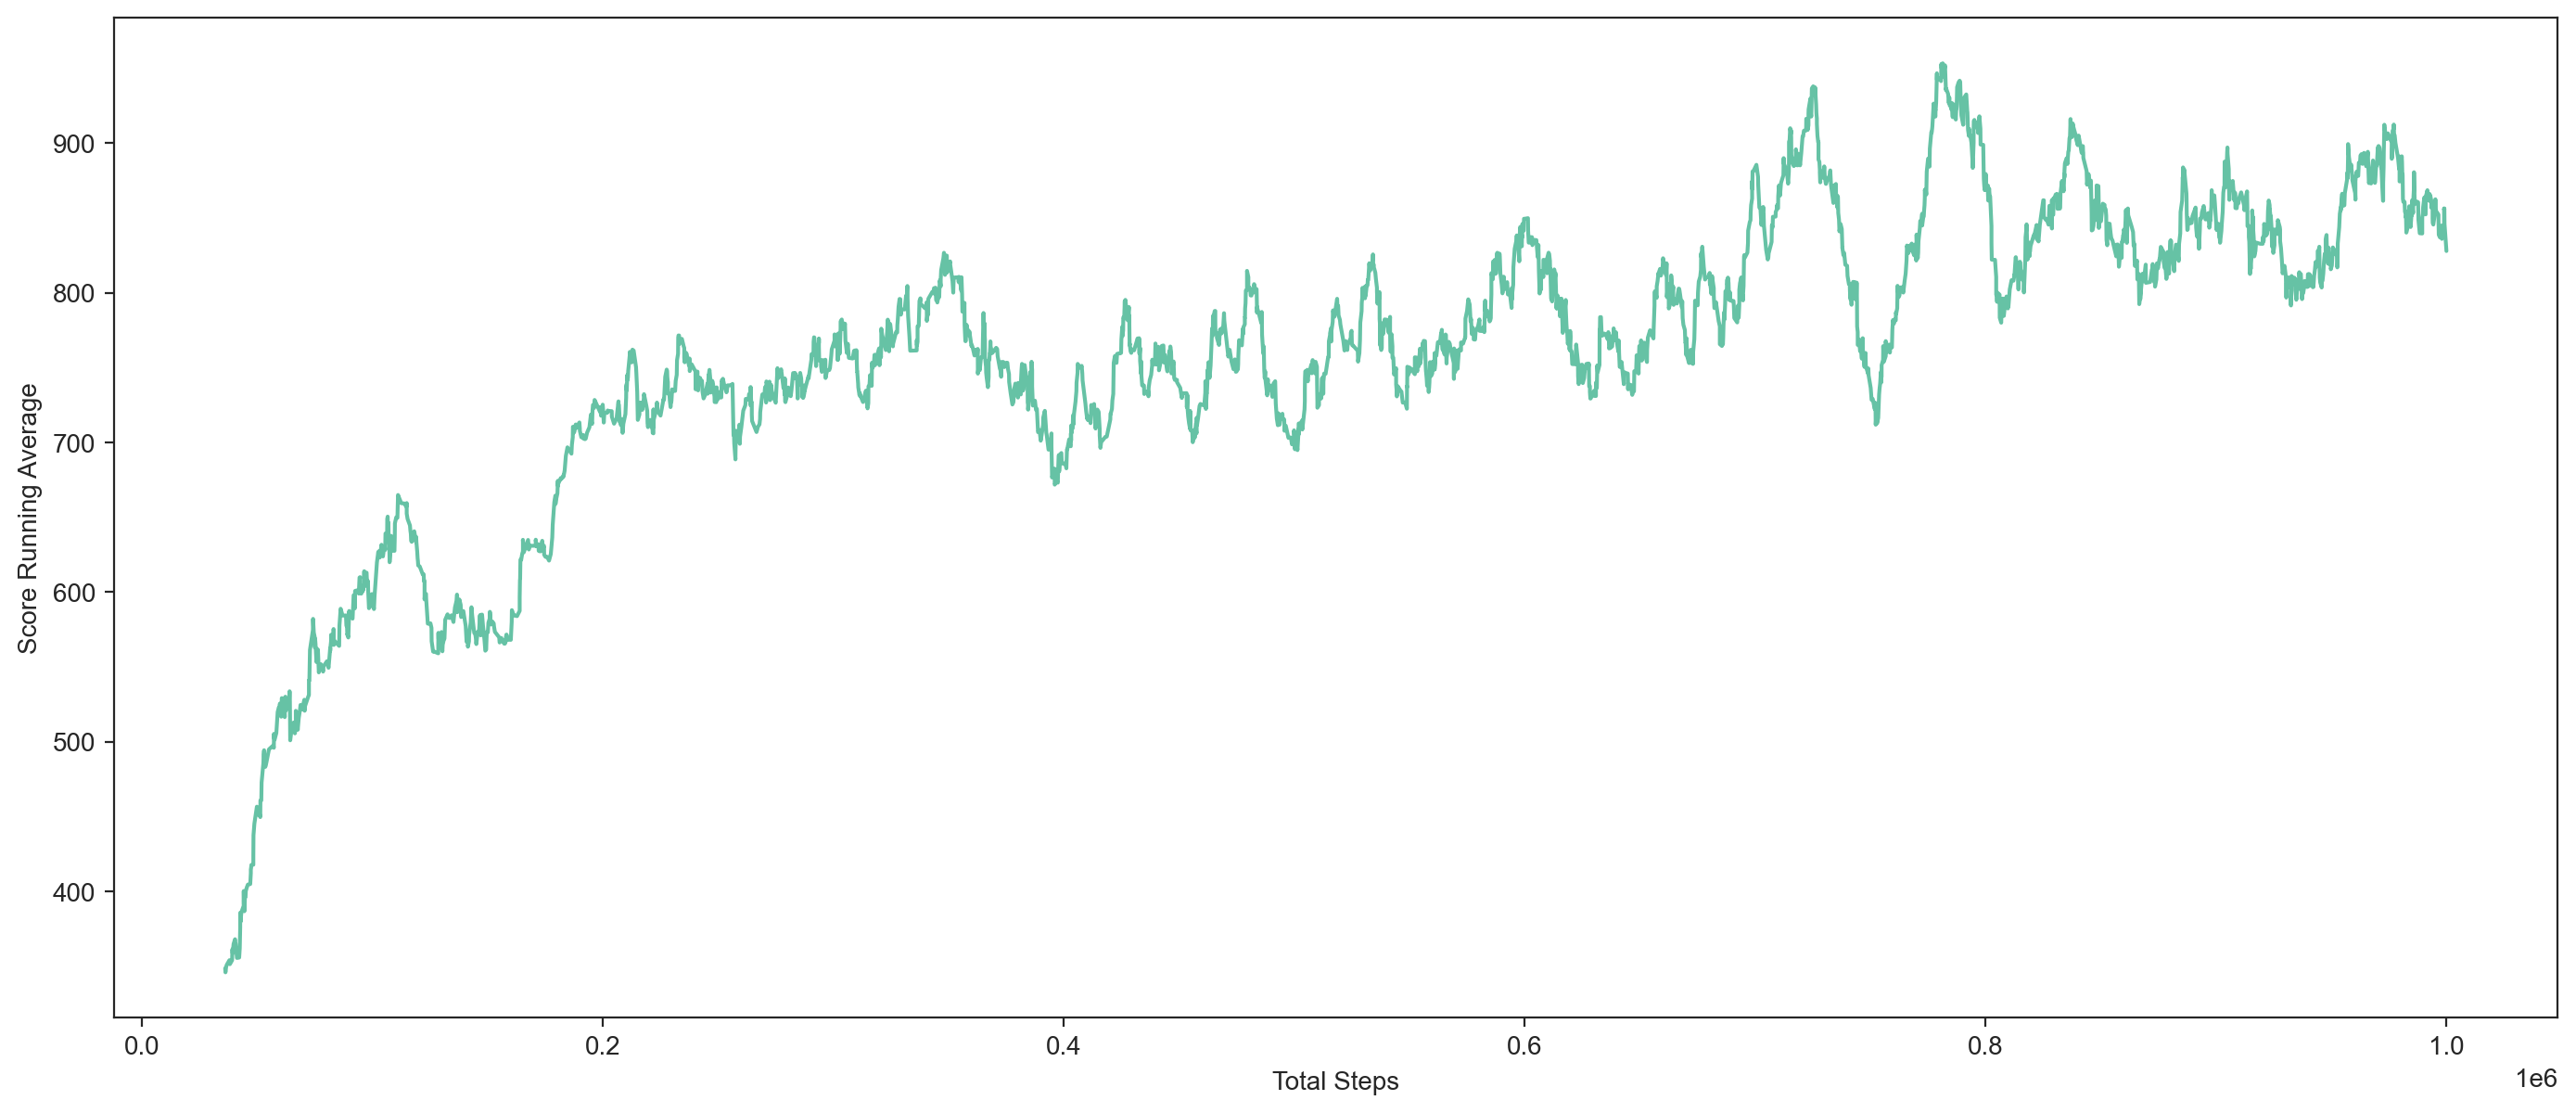

In [18]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

experiment = pd.DataFrame(np.load("BTR_SMB1200M_1/BTR_SMB1200MExperiment.npy"))
print(len(experiment))
scoreRunningAve = moving_average(experiment[0], 100)
plt.plot(experiment[1][len(experiment[1]) - len(scoreRunningAve):], scoreRunningAve);
plt.xlabel("Total Steps")
plt.ylabel("Score Running Average");